In [1]:
%matplotlib inline

import sys
sys.path.append('../')

import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt

from src.augmentation import iaa
from src.utils import plot_list

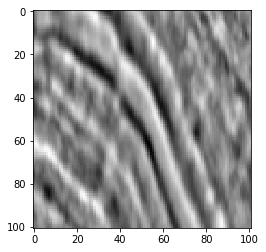

In [44]:
IMG_DIR = '/mnt/ml-team/minerva/open-solutions/salt/files/train/images'
IMG_IDX = 18
img_filepath = sorted(glob.glob('{}/*'.format(IMG_DIR)))[IMG_IDX]
img = np.array(Image.open(img_filepath))
plt.imshow(img)

# Affine augmentations

In [49]:
affine_seq = iaa.Sequential([
    # General
    iaa.SomeOf((1, 2),
               [iaa.Fliplr(0.5),
                iaa.Affine(rotate=(-20, 20),
                           translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)}, mode='symmetric'),
                ]),
    # Deformations
    iaa.Sometimes(0.3, iaa.PiecewiseAffine(scale=(0.02, 0.04))),
    iaa.Sometimes(0.3, iaa.PerspectiveTransform(scale=(0.05, 0.10))),
], random_order=True)


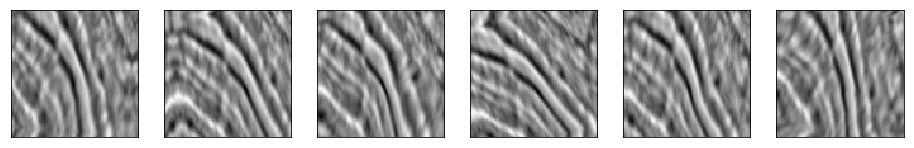

In [50]:
AUG_NR = 6
aug_imgs = []
for _ in range(AUG_NR):
    aug_img = affine_seq.augment_image(img)
    aug_imgs.append(aug_img)
plot_list(images=aug_imgs)

# Intensity Augmentations

In [151]:
intensity_seq = iaa.Sequential([
    iaa.Invert(0.3),
    iaa.Sometimes(0.3, iaa.ContrastNormalization((0.5, 1.5))),
    iaa.OneOf([
        iaa.Noop(),
        iaa.Sequential([
            iaa.OneOf([
                iaa.Add((-30, 30)),
                iaa.AddElementwise((-20, 20)),
                iaa.Multiply((0.9, 1.1)),
                iaa.MultiplyElementwise((0.9, 1.1)),
            ]),
        ]),
        iaa.OneOf([
            iaa.GaussianBlur(sigma=(0.0, 2.0)),
            iaa.AverageBlur(k=(2, 7)),
            iaa.MedianBlur(k=(3, 7))
        ])
    ])
], random_order=False)

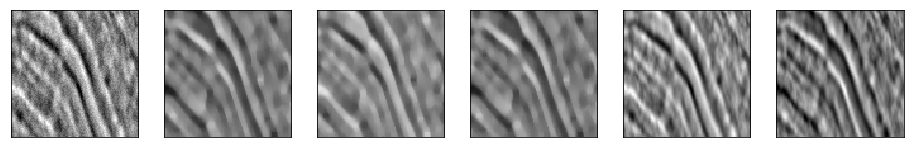

In [152]:
AUG_NR = 6
aug_imgs = []
for _ in range(AUG_NR):
    aug_img = intensity_seq.augment_image(img)
    aug_imgs.append(aug_img)
plot_list(images=aug_imgs)